Stefannus Christian 202000138 (NIM Genap)

In [333]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [334]:
plt.rcParams["figure.figsize"] = (14, 7)

# Projek A

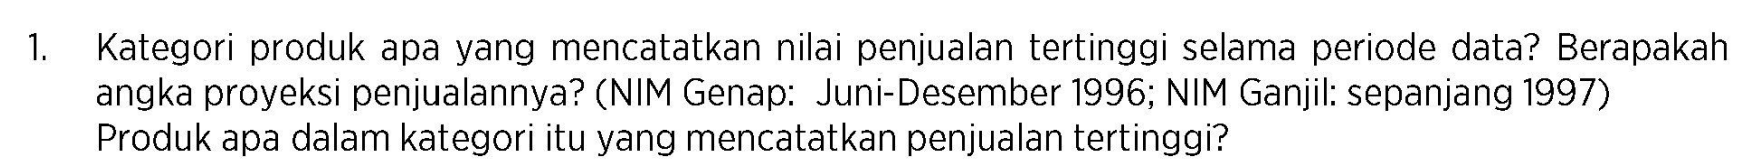

## Kategori produk dengan nilai penjualan tertinggi

In [335]:
dates = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

def convert_date(date: str, info):
    d,m,y = date.split('-')
    if info == 'day':
        return int(d)
    elif info == 'month':
        return dates[m]
    elif info == 'year':
        return int('19'+y)

In [336]:
categories = pd.read_csv('./Northwind_csv/Categories.csv',delimiter=';')
customers = pd.read_csv('./Northwind_csv/Customers.csv',delimiter=';')
employees = pd.read_csv('./Northwind_csv/Employees.csv',delimiter=';')
order_details = pd.read_csv('./Northwind_csv/OrderDetails.csv',delimiter=';')
orders = pd.read_csv('./Northwind_csv/Orders.csv',delimiter=';')
products = pd.read_csv('./Northwind_csv/Products.csv',delimiter=';')
shippers = pd.read_csv('./Northwind_csv/Shippers.csv',delimiter=';')
suppliers = pd.read_csv('./Northwind_csv/Suppliers.csv',delimiter=';')

In [337]:
orders["Order Date Day"] = orders['Order Date'].apply(lambda x: convert_date(x,'day'))
orders["Order Date Month"] = orders['Order Date'].apply(lambda x: convert_date(x,'month'))
orders["Order Date Year"] = orders['Order Date'].apply(lambda x: convert_date(x,'year'))

In [338]:
def clean_unit_price(unit_price): 
    unit_price = unit_price[1:]
    unit_price = unit_price.replace(',','.')
    return float(unit_price)

def clean_discount(discount):
    discount = discount[:-1]
    discount = discount.replace(',','.')
    return float(discount)

order_details["Unit Price"] = order_details["Unit Price"].apply(lambda x: clean_unit_price(x))

In [339]:
order_details["Discount"] = order_details["Discount"].apply(lambda x: clean_discount(x))

In [340]:
order_details["Nilai Penjualan"] = order_details["Unit Price"] * order_details["Quantity"] * (1-(order_details["Discount"]/100))

In [341]:
order_details 

,Order ID,Product,Unit Price,Quantity,Discount,Nilai Penjualan
0,10248,Queso Cabrales,14.00,12,0.0,168.0000
1,10248,Singaporean Hokkien Fried Mee,9.80,10,0.0,98.0000
2,10248,Mozzarella di Giovanni,34.80,5,0.0,174.0000
3,10249,Tofu,18.60,9,0.0,167.4000
4,10249,Manjimup Dried Apples,42.40,40,0.0,1696.0000
5,10250,Jack's New England Clam Chowder,7.70,10,0.0,77.0000
6,10250,Manjimup Dried Apples,42.40,35,15.0,1261.4000
7,10250,Louisiana Fiery Hot Pepper Sauce,16.80,15,15.0,214.2000
8,10251,Gustaf's Knckebrd,16.80,6,5.0,95.7600
9,10251,Ravioli Angelo,15.60,15,5.0,222.3000


In [342]:
products["Unit Price"] = products["Unit Price"].apply(lambda x: clean_unit_price(x))

In [343]:
order_order_details = orders.merge(order_details,left_on="Order ID",right_on="Order ID")

In [344]:
order_order_details_products = order_order_details.merge(products.drop(["Unit Price"],axis=1),left_on="Product",right_on="Product Name")
nomor_1 = order_order_details_products.groupby(["Category"]).sum().sort_values('Nilai Penjualan',ascending=False)
nomor_1

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Category,,,,,,,,,,,,,
Beverages,4312144,6346,2371,806085,11811.65,9532,2500.0,267868.1800,16356,18111,2430,6715,51
Dairy Products,3894474,6016,2248,730230,9875.80,9149,1956.0,234507.2850,17806,13424,5310,3640,0
Confections,3557446,5334,1945,666404,7549.30,7906,1902.0,167357.2250,12147,7944,3580,2895,0
Meat/Poultry,1839680,2947,1028,345164,7417.33,4199,1115.0,163022.3595,6951,4696,0,1020,104
Seafood,3523066,5253,2022,658433,6290.78,7681,1988.0,131261.7375,11139,21178,1280,3790,0
Condiments,2303505,3258,1352,430965,4605.30,5298,1137.0,106047.0850,9557,10416,1640,2405,10
Produce,1450501,2147,755,271356,4786.45,2990,618.0,99984.5800,4386,2895,260,745,33
Grains/Cereals,2090139,2731,1171,391069,4164.30,4562,888.0,95744.5875,9567,7096,2900,4435,30


## Produk di Kategori Beverages (kategori dengan nilai penjualan tertinggi) yang memiliki nilai penjualan tertinggi

In [345]:
beverages = order_order_details_products[order_order_details_products["Category"] == "Beverages"]
beverages.groupby(["Product Name"]).sum().sort_values("Nilai Penjualan",ascending=False).head()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,255583,410,120,47887,5902.4,623,110.0,141396.735,912,408,0,360,0
Ipoh Coffee,298531,401,169,55866,1205.2,580,140.0,23526.700,1204,476,280,700,0
Chang,470965,696,245,87795,786.6,1057,450.0,16355.960,88,748,1760,1100,0
Lakkalikri,415841,554,260,77812,662.4,981,205.0,15760.440,2964,2223,0,780,0
Steeleye Stout,383553,552,200,71829,612.0,883,170.0,13644.000,1260,720,0,540,0


## Proyeksi Penjualan (Juli - Desember 1996)

In [346]:
order_order_details_products_groupby = order_order_details_products.groupby(["Category","Order Date Year","Order Date Month"]).sum().reset_index()
beverages_products_groupby = order_order_details_products_groupby[(order_order_details_products_groupby["Category"] == "Beverages")]
beverages_products_groupby.head()

,Category,Order Date Year,Order Date Month,Order ID,Order Date Day,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
0,Beverages,1994,8,112857,205,134.4,272,75.0,3182.50,383,336,140,180,2
1,Beverages,1994,9,164550,299,201.0,347,55.0,4866.88,656,827,20,220,4
2,Beverages,1994,10,123689,215,222.2,285,10.0,5088.40,529,526,100,250,0
3,Beverages,1994,11,113604,138,371.4,286,85.0,7971.36,423,433,130,215,0
4,Beverages,1994,12,165680,264,764.4,347,90.0,17378.06,636,913,0,195,3


In [347]:
X = beverages_products_groupby[["Order Date Month","Order Date Year"]].values
y = beverages_products_groupby["Nilai Penjualan"].values
reg = RandomForestRegressor()
reg.fit(X,y)
prediction_score = reg.score(X,y)*100

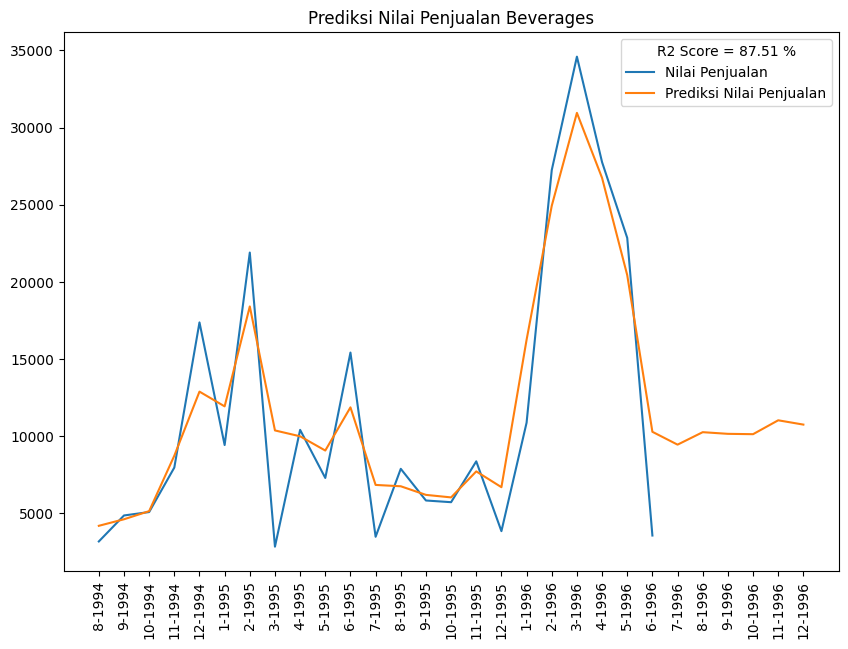

In [348]:
plt.figure(figsize=(10,7))
x_predict = np.array([
    [7,1996],
    [8,1996],
    [9,1996],
    [10,1996],
    [11,1996],
    [12,1996]
])
x_concat = np.concatenate((X,x_predict),axis=0)
x_label = [f'{i}-{j}' for i,j in x_concat]  
X_label = [f'{i}-{j}' for i,j in X]
prediction = reg.predict(x_concat)
plt.plot(X_label,y,label="Nilai Penjualan")
plt.plot(x_label,prediction,label="Prediksi Nilai Penjualan")
plt.xticks(rotation=90)
plt.legend()
plt.title("Prediksi Nilai Penjualan Beverages")
plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
plt.show()

In [349]:
proyeksi_juli_des_96 = reg.predict(x_predict)
months = ["July 1996","August 1996","September 1996","October 1996","November 1996","December 1996"]
proyeksi_juli_des_96_df= pd.DataFrame({"Proyeksi Nilai Penjualan": proyeksi_juli_des_96, "Tanggal": months})
display(proyeksi_juli_des_96_df)

,Proyeksi Nilai Penjualan,Tanggal
0,9456.17300,July 1996
1,10264.18300,August 1996
2,10156.58945,September 1996
3,10134.01575,October 1996
4,11034.07605,November 1996
5,10755.32215,December 1996


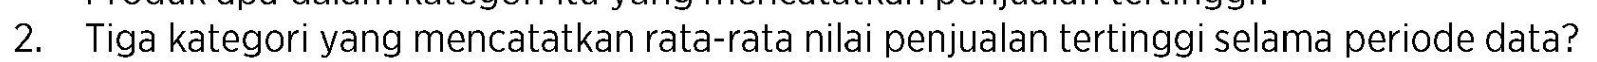

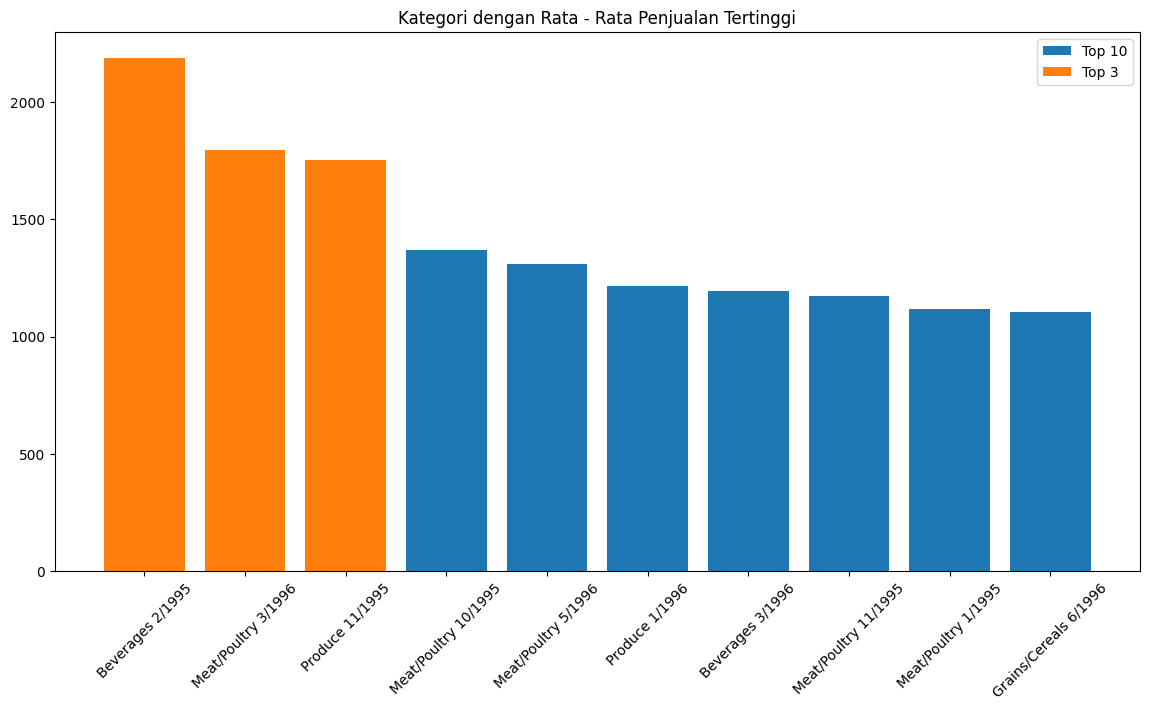

In [350]:
nomor_2 = order_order_details_products.groupby(["Category","Order Date Year","Order Date Month"]).mean().reset_index().sort_values('Nilai Penjualan',ascending=False).head(10)
nomor_2_tiga_kategori = nomor_2[["Category","Order Date Year","Order Date Month","Nilai Penjualan"]]
cat_year_month_nomor_2 = [f'{i} {k}/{j}' for i,j,k,_ in nomor_2_tiga_kategori.values]
ax = plt.bar(cat_year_month_nomor_2,nomor_2_tiga_kategori["Nilai Penjualan"],label="Top 10")
plt.bar(cat_year_month_nomor_2[:3],nomor_2_tiga_kategori["Nilai Penjualan"][:3],label="Top 3")
plt.xticks(rotation=45)
plt.title("Kategori dengan Rata - Rata Penjualan Tertinggi")
plt.legend()
labels = nomor_2_tiga_kategori["Nilai Penjualan"]
plt.show()

In [351]:
nomor_2[["Category","Order Date Month","Order Date Year","Nilai Penjualan"]][:3]

,Category,Order Date Month,Order Date Year,Nilai Penjualan
6,Beverages,2,1995,2190.416000
134,Meat/Poultry,3,1996,1794.926923
153,Produce,11,1995,1754.350000


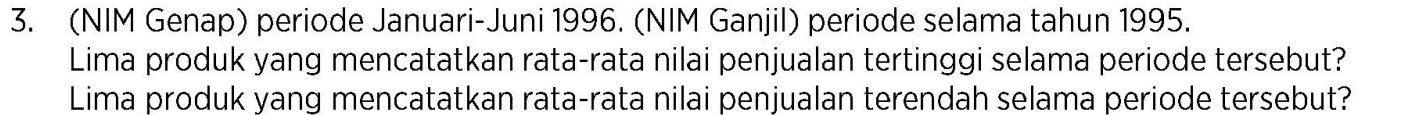

In [352]:
order_order_details_products_jan_june_96 = order_order_details_products[(order_order_details_products["Order Date Year"] == 1996) & (order_order_details_products["Order Date Month"] < 7)]
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).head()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Cte de Blaye,10873.727273,15.545455,2.636364,1996.0,263.50,25.000000,0.909091,6479.704545,38.0,17.0,0.0,15.0,0.0
Thringer Rostbratwurst,10896.500000,17.785714,2.928571,1996.0,123.79,27.857143,11.785714,2983.339000,29.0,0.0,0.0,0.0,1.0
Raclette Courdavault,10919.062500,16.187500,3.312500,1996.0,55.00,36.125000,3.437500,1867.421875,59.0,79.0,0.0,0.0,0.0
Sir Rodney's Marmalade,10952.857143,13.142857,4.000000,1996.0,81.00,15.857143,2.000000,1243.465714,20.0,40.0,0.0,0.0,0.0
Schoggi Schokolade,10881.750000,15.000000,2.750000,1996.0,43.90,26.250000,0.000000,1152.375000,27.0,49.0,0.0,30.0,0.0


In [353]:
order_order_details_products_jan_june_96.groupby(["Product Name"]).mean().sort_values('Nilai Penjualan',ascending=False).tail()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan,ProductID,Units In Stock,Units On Order,Reorder Level,Discontinued
Product Name,,,,,,,,,,,,,
Rd Kaviar,10979.000000,9.000000,4.500000,1996.0,15.00,6.000000,0.500000,89.850000,73.0,101.0,0.0,5.0,0.0
Tourtire,10880.333333,23.555556,2.444444,1996.0,7.45,14.000000,12.777778,86.875278,54.0,21.0,0.0,10.0,0.0
Chocolade,10814.000000,5.000000,2.000000,1996.0,12.75,8.000000,15.000000,86.700000,48.0,15.0,70.0,25.0,0.0
Filo Mix,10926.076923,11.153846,3.615385,1996.0,7.00,12.461538,5.769231,78.319231,52.0,38.0,0.0,25.0,0.0
Geitost,10940.000000,19.000000,3.600000,1996.0,2.50,20.200000,4.500000,47.662500,33.0,112.0,0.0,20.0,0.0


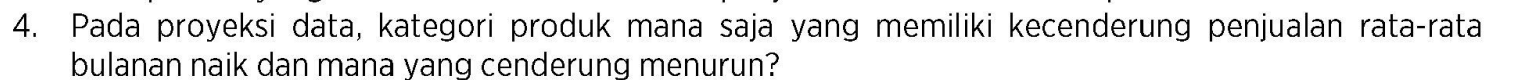

[10770.66725 11289.96175 11307.7281  11218.3895  11954.02945 12154.84625]


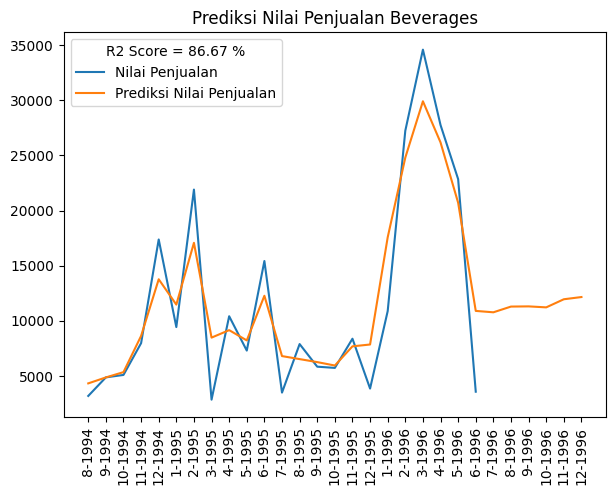

[4095.6708   4761.3452   4685.53255  4541.858325 5734.41595  5374.2404  ]


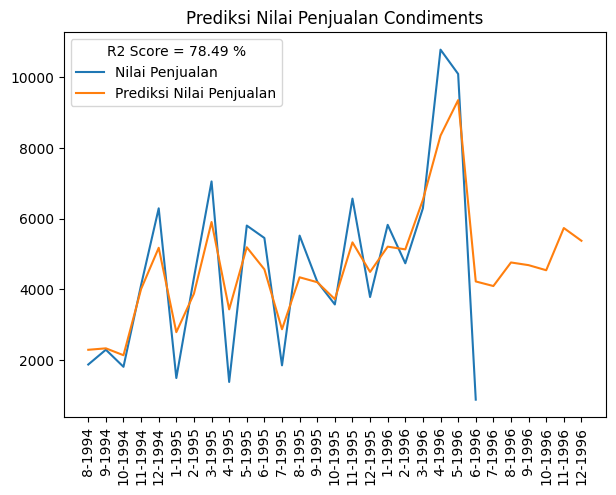

[5119.730175 4987.60505  5216.21415  5079.958325 5746.021525 5448.3556  ]


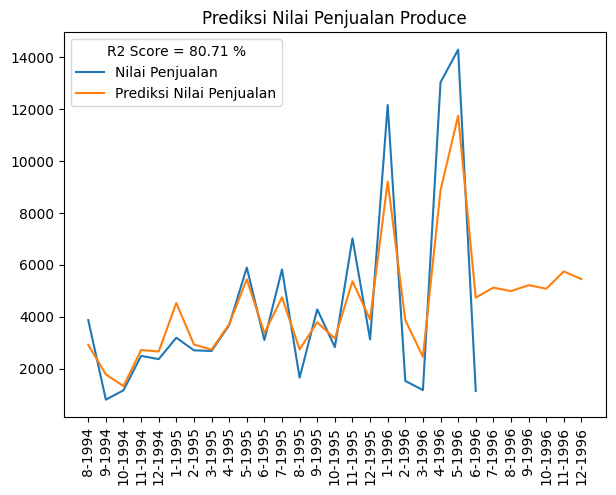

[ 6148.9186   6235.0639   6354.7191   8651.9206  10239.99868  7298.04186]


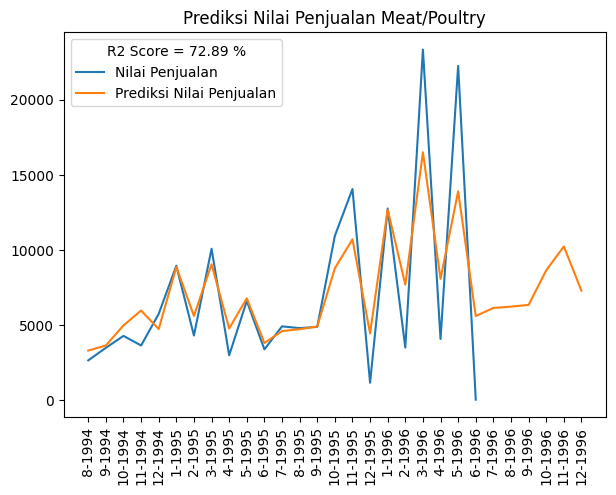

[4183.49575  5586.809675 6346.9037   6444.77075  5962.8191   5995.12625 ]


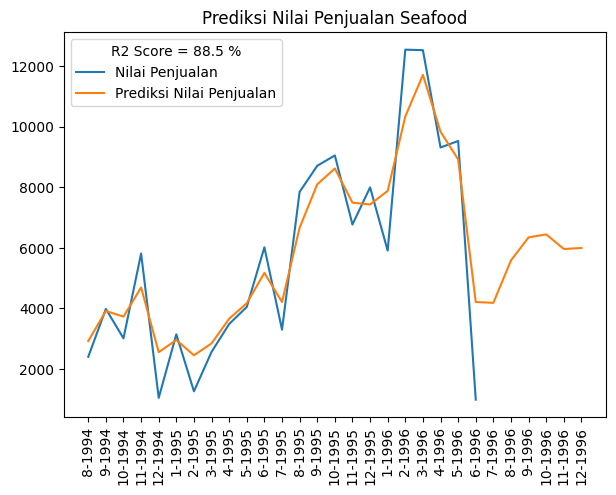

[11402.3796  12617.9723  12389.3061  12997.4743  13522.4979  13596.49765]


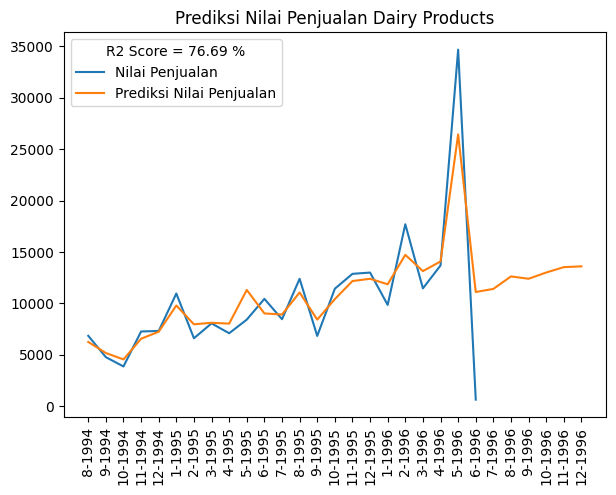

[3849.554455 5374.61373  5663.199625 5646.813325 5709.10066  5259.71492 ]


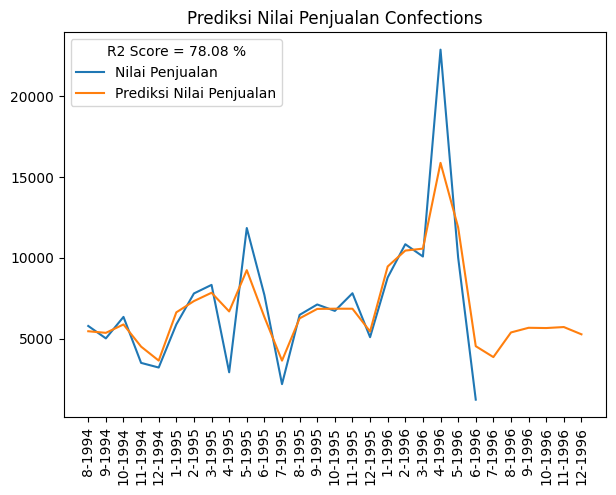

[5305.794575 5069.039575 5271.973375 5149.719975 4516.673775 5331.368375]


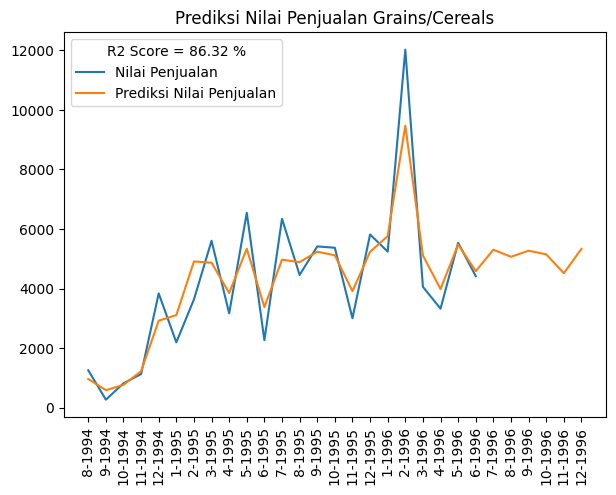

In [354]:
all_categories = products["Category"].unique()
chat_gpt = []
for cat in all_categories:
    plt.figure(figsize=(7,5))
    the_cat_df = order_order_details_products_groupby[(order_order_details_products_groupby["Category"] == cat)]
    X = the_cat_df[["Order Date Month","Order Date Year"]].values
    y = the_cat_df["Nilai Penjualan"].values
    reg = RandomForestRegressor()
    reg.fit(X,y)
    prediction_score = reg.score(X,y)*100
    x_test = np.array([
        [7,1996],
        [8,1996],
        [9,1996],
        [10,1996],
        [11,1996],
        [12,1996]
    ])

    x_concat = np.concatenate((X,x_test),axis=0)

    x_label = [f'{i}-{j}' for i,j in x_concat]  
    X_label = [f'{i}-{j}' for i,j in X]

    prediction = reg.predict(x_concat)
    the_proyeksi = prediction[-6:]
    print(the_proyeksi)

    plt.plot(X_label,y,label="Nilai Penjualan")
    plt.plot(x_label,prediction,label="Prediksi Nilai Penjualan")
    plt.xticks(rotation=90)
    plt.legend()
    plt.title(f"Prediksi Nilai Penjualan {cat}")
    plt.legend(title=f'R2 Score = {round(prediction_score,2)} %')
    plt.show()

In [355]:
chat_gpt

[]

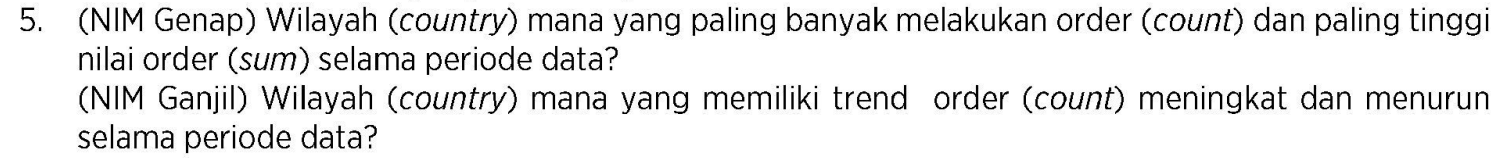

In [356]:
order_order_details_customers = order_order_details.merge(customers,left_on="Customer",right_on="Company Name")
nomor_5 = order_order_details_customers.groupby(["Country"]).count().sort_values('Nilai Penjualan',ascending=False)
nomor_5

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,...,Customer ID,Company Name,Contact Name,Contact Title,Address,City,Region,Postal Code,Phone,Fax
Country,,,,,,,,,,,,,,,,,,,,,
USA,352,352,352,352,352,325,352,352,352,352,...,352,352,352,352,352,352,352,352,352,197
Germany,328,328,328,328,328,321,328,328,328,328,...,328,328,328,328,328,328,0,328,328,192
Brazil,203,203,203,203,203,197,203,203,203,203,...,203,203,203,203,203,203,203,203,203,69
France,182,182,182,182,182,178,182,182,182,182,...,182,182,182,182,182,182,0,182,182,182
UK,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,23,135,135,90
Austria,125,125,125,125,125,118,125,125,125,125,...,125,125,125,125,125,125,0,125,125,125
Venezuela,118,118,118,118,118,110,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
Sweden,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,0,97,97,52
Canada,75,75,75,75,75,73,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75


In [357]:
nomor_5["Order ID"].sum()

2153

In [358]:
order_order_details_customers.groupby(["Country"]).sum().sort_values('Nilai Penjualan',ascending=False).head()

,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price,Quantity,Discount,Nilai Penjualan
Country,,,,,,,,
USA,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105
Germany,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335
Austria,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385
Brazil,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765
France,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125


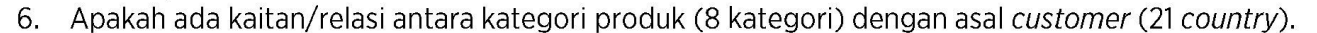

In [359]:
categories_products = categories.merge(products,left_on="Category Name",right_on="Category")
categories_products_order_details_order_customers = categories_products.merge(order_order_details_customers,left_on = "Product Name",right_on="Product")

In [360]:
import numpy as np
ordinalEncoder = OrdinalEncoder()

country_df = np.array(categories_products_order_details_order_customers["Country"]).reshape(-1,1)
country_ordinal_encoder = ordinalEncoder.fit_transform(country_df)

categories_df = np.array(categories_products_order_details_order_customers["Category"]).reshape(-1,1)
categories_ordinal_encoder = ordinalEncoder.fit_transform(categories_df)

In [361]:
categories_products_order_details_order_customers["Country Ordinal"] = country_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"] = categories_ordinal_encoder
categories_products_order_details_order_customers["Category Ordinal"].corr(categories_products_order_details_order_customers["Country Ordinal"])

0.02760358198744432

In [362]:
categories_products_order_details_order_customers.groupby(["Country","Category"]).sum().reset_index()

,Country,Category,Category ID,Picture,ProductID,Unit Price_x,Units In Stock,Units On Order,Reorder Level,Discontinued,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_y,Quantity,Discount,Nilai Penjualan,Country Ordinal,Category Ordinal
0,Argentina,Beverages,7,0.0,368,381.25,399,10,125,0,75964,123,24,13971,381.25,82,0.0,1798.0000,0.0,0.0
1,Argentina,Condiments,6,0.0,143,62.85,145,0,40,1,32660,70,19,5987,62.85,45,0.0,907.0000,0.0,3.0
2,Argentina,Confections,24,0.0,241,263.18,146,150,50,0,85843,167,35,15964,254.85,57,0.0,2135.1000,0.0,16.0
3,Argentina,Dairy Products,24,0.0,238,157.80,236,140,95,0,65227,128,23,11975,157.80,54,0.0,1143.5000,0.0,18.0
4,Argentina,Grains/Cereals,5,0.0,57,19.50,36,0,20,0,10916,29,3,1996,19.50,20,0.0,390.0000,0.0,4.0
5,Argentina,Produce,28,0.0,100,151.85,96,0,20,1,43020,59,21,7982,147.20,33,0.0,1139.0000,0.0,24.0
6,Argentina,Seafood,40,0.0,213,61.05,428,0,50,0,53767,98,19,9978,57.35,48,0.0,606.5000,0.0,35.0
7,Austria,Beverages,22,0.0,860,815.00,942,110,320,5,235276,301,124,43897,701.30,982,155.0,23317.3000,22.0,0.0
8,Austria,Condiments,32,0.0,758,400.55,772,240,175,2,169617,193,103,31921,371.45,720,105.0,15237.2425,16.0,16.0
9,Austria,Confections,42,0.0,386,365.46,341,190,140,0,148658,227,80,27932,348.26,575,95.0,13534.4075,14.0,28.0


In [363]:
# Create a contingency table of Product Category and Customer Country
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

# Apply the chi-squared test to the contingency table
chi2, pval, dof, expected = stats.chi2_contingency(cont_table)

# Print the results
print('Chi-squared statistic:', chi2)
print('P-value:', pval)

Chi-squared statistic: 145.27062658850997
P-value: 0.36285296961683283


In [364]:
cont_table = pd.crosstab(categories_products_order_details_order_customers['Category'], categories_products_order_details_order_customers['Country'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

n = min(cont_table.shape)

v = np.sqrt(chi2/(n*(min(n-1, dof-1))))

print("Cramer's V statistic:", v)
print("P-value:", p)

Cramer's V statistic: 1.6106266891920293
P-value: 0.36285296961683283


Berdasarkan ukuran korelasi yang diberikan dan analisis manual yang dilakukan, dapat disimpulkan bahwa terdapat hubungan yang lemah atau tidak ada hubungan sama sekali antara Kategori Produk dan Negara Pelanggan.

Koefisien korelasi yang diperoleh menggunakan fungsi corr hanya sebesar 0.027, menunjukkan adanya korelasi positif yang lemah antara kedua variabel. Begitu juga, uji Chi-squared dan uji Cramer's V juga menunjukkan hubungan yang tidak signifikan dengan nilai p yang lebih besar dari 0,05.

Selain itu, analisis manual menunjukkan bahwa kategori yang paling banyak dan paling sedikit dibeli bervariasi di setiap negara, menunjukkan bahwa negara pelanggan bukanlah faktor yang signifikan dalam menentukan kategori produk.

Oleh karena itu, dapat disimpulkan bahwa kategori produk dan negara pelanggan pada umumnya tidak saling terkait satu sama lain, dan tidak ada bukti kuat yang menunjukkan adanya hubungan yang signifikan antara keduanya.

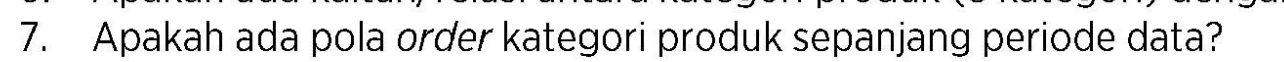

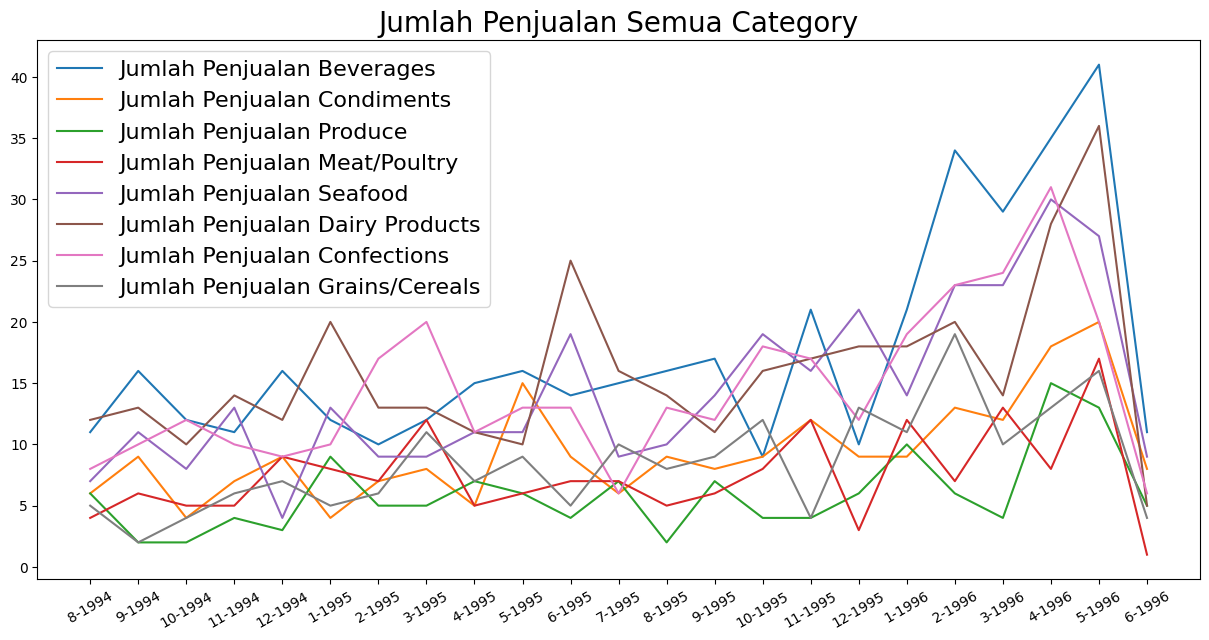

In [365]:
order_order_details_products_groupby_count = order_order_details_products.groupby(["Category","Order Date Year","Order Date Month"]).count().reset_index()
plt.figure(figsize=(15,7))
all_categories = products["Category"].unique()
all_y = []

for cat in all_categories:
    nomor_7_df = order_order_details_products_groupby_count[(order_order_details_products_groupby_count["Category"] == cat)]
    X = nomor_7_df[["Order Date Month","Order Date Year"]].values
    y = nomor_7_df["Nilai Penjualan"].values
    
    X_label = [f'{i}-{j}' for i,j in X]
    all_y.append([cat,list(zip(X_label,y))])

    plt.plot(X_label,y,label=f"Jumlah Penjualan {cat}")

plt.xticks(rotation=30)
plt.legend(prop={'size': 16})
plt.title(f"Jumlah Penjualan Semua Category",fontsize=20)
plt.show()

Dari data yang diberikan, terlihat bahwa jumlah order tiap bulan pada kategori produk tertentu naik dan turun dalam pola yang berbeda-beda. Namun, secara umum, terlihat bahwa jumlah order pada setiap kategori produk cenderung naik dari waktu ke waktu.

Berikut adalah beberapa temuan yang dapat diambil dari data ini:

Beverages adalah kategori produk dengan jumlah order terbanyak pada setiap bulannya, dengan jumlah order tertinggi terjadi pada bulan Mei 1996.
Seafood adalah kategori produk dengan jumlah order terbanyak kedua pada setiap bulannya, dengan jumlah order tertinggi terjadi pada bulan Desember 1995.
Produce adalah kategori produk dengan jumlah order terendah pada setiap bulannya, dengan jumlah order terendah terjadi pada bulan September 1994.
Kategori produk yang menunjukkan kenaikan yang signifikan dalam jumlah order dari waktu ke waktu adalah Beverages dan Seafood. Keduanya menunjukkan tren kenaikan yang stabil hingga akhir periode data.
Kategori produk lainnya seperti Condiments dan Meat/Poultry cenderung menunjukkan fluktuasi dalam jumlah order mereka dari waktu ke waktu, meskipun secara umum jumlah order mereka cenderung naik.
Selama dua tahun periode data, terdapat peningkatan yang signifikan dalam jumlah order pada bulan-bulan akhir tahun seperti November, Desember dan Mei. Ini dapat mengindikasikan bahwa bulan-bulan ini adalah bulan yang lebih sibuk bagi toko tersebut, mungkin terkait dengan musim liburan atau perayaan.
Kesimpulannya, data ini memberikan gambaran yang berguna tentang tren jumlah order kategori produk tertentu selama dua tahun. Dari data ini, dapat diambil beberapa informasi yang dapat membantu dalam perencanaan bisnis dan pengambilan keputusan, seperti menyesuaikan persediaan produk pada bulan-bulan dengan jumlah order tertinggi dan memperkuat penawaran produk-produk kategori yang paling diminati.

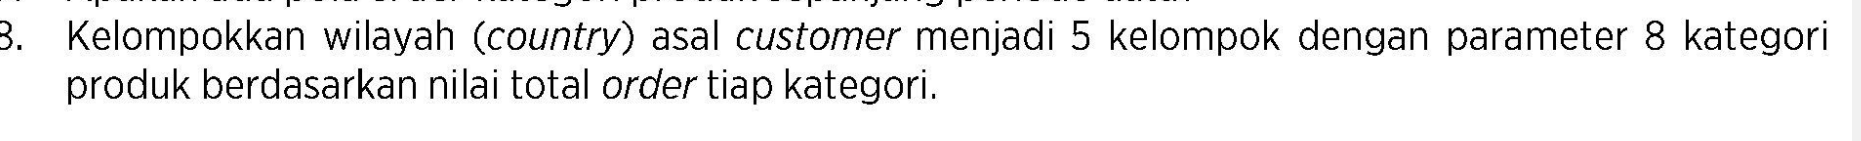

In [366]:
categories_products_order_details_order_customers.groupby(["Country"]).sum().sort_values("Nilai Penjualan",ascending=False).head()

,Category ID,Picture,ProductID,Unit Price_x,Units In Stock,Units On Order,Reorder Level,Discontinued,Order ID,Order Date Day,Order Date Month,Order Date Year,Unit Price_y,Quantity,Discount,Nilai Penjualan,Country Ordinal,Category Ordinal
Country,,,,,,,,,,,,,,,,,,
USA,1470,0.0,14144,11071.86,13860,2710,4050,39,3764864,5600,2339,702326,10462.91,9330,2094.0,245584.6105,6688.0,1118.0
Germany,1342,0.0,13409,9003.81,13357,2810,3900,26,3487000,5232,2143,654398,8544.84,9213,2070.0,230284.6335,2624.0,1014.0
Austria,498,0.0,4832,3771.13,4482,1620,1490,20,1332339,1954,680,249408,3469.95,5167,860.0,128003.8385,125.0,373.0
Brazil,821,0.0,8053,5690.69,8608,1230,2365,19,2162294,3342,1149,405033,5324.64,4247,1350.0,106925.7765,609.0,618.0
France,788,0.0,7429,5200.05,7851,1190,2230,16,1935829,2907,1075,363124,4805.81,3224,1005.0,80837.9125,1274.0,606.0


In [367]:
# Normalisasi data dengan StandardScaler
scaler = StandardScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(categories_products_order_details_order_customers[['Nilai Penjualan']]))

# Melakukan k-means clustering dengan jumlah klaster = 5
kmeans = KMeans(n_clusters=5, random_state=0).fit(normalized_df)

# Menambahkan kolom klaster pada DataFrame
categories_products_order_details_order_customers['Cluster'] = kmeans.fit_predict(normalized_df)
nomor_8 = categories_products_order_details_order_customers.groupby(["Cluster","Country"]).sum().reset_index()
pd.set_option('display.max_rows', None)
nomor_8[["Country","Cluster"]]

,Country,Cluster
0,Argentina,0
1,Austria,0
2,Belgium,0
3,Brazil,0
4,Canada,0
5,Denmark,0
6,Finland,0
7,France,0
8,Germany,0
9,Ireland,0
